In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prior(mu):
    return np.ones(len(mu))

def verosimilitud(x,mu,sigma):
    norm = 1/(2*np.pi*sigma**2)**(1/2)
    return np.exp(-(x-mu)**2/(2*sigma**2))*norm

def mu_sigma(x_k,sigma_k):
    w_k = sigma_k**-2
    mu = np.sum(x_k*w_k)/np.sum(w_k)
    sigma = np.sum(w_k)**(-1/2)
    return mu,sigma

In [3]:
mu = np.linspace(-20,20,1000)
#x_k = np.linspace(-10,15,10)
x_k = np.random.normal(loc=5.9,scale=0.8,size=20)
#x_k = np.array([4.6, 6.0, 2.0, 5.8])
#sigma_k = np.array( [2.0, 1.5, 5.0, 1.0])
sigma_k = np.linspace(1,5,len(x_k))


log_V = np.zeros(len(mu))

#print(verosimilitud(x_k[10],mu,sigma_k[10]))

for i in range(len(x_k)):
    log_V += np.log(verosimilitud(x_k[i],mu,sigma_k[i]))
    #print(V_i)

log_pos = log_V + np.log(prior(mu))
log_evidencia = np.amax(log_pos)

log_pos = log_pos-log_evidencia
posterior = np.exp(log_pos)
posterior = posterior/np.trapz(posterior,mu)

# Método 'manual' ---------------------------------------------
cero = np.argmax(log_pos)
mu_0 = mu[cero]
d2 = (log_pos[cero+1] - 2*log_pos[cero] + log_pos[cero-1]) / ((mu[cero]-mu[cero-1])**2)
sigma_0 = (-d2)**(-1/2)

# Método directo ----------------------------------------------
#mu_0,sigma_0 = mu_sigma(x_k,sigma_k)
print(mu_sigma(x_k,sigma_k))

(6.55130727330383, 0.47921519946275637)


In [4]:
lista = [np.mean(x_k)]

N = 20000
for i in range(1,N):
    propuesta_mu  = lista[i-1] + np.random.normal(loc=0, scale=5E-1)
    
    likely_nuevo = np.sum(np.log(verosimilitud(x_k,propuesta_mu,sigma_k)))
    likely_viejo = np.sum(np.log(verosimilitud(x_k,lista[i-1],sigma_k)))
    
    
    r = min(0,likely_nuevo-likely_viejo);
    alpha = np.random.random()
    if(alpha<=np.exp(r)):
        lista.append(propuesta_mu)
    else:
        lista.append(lista[i-1])
        
z = np.array(lista)
print(z.size)

20000


(array([1.37882277e-03, 0.00000000e+00, 3.44705691e-03, 2.06823415e-03,
        2.06823415e-03, 3.44705691e-03, 1.17199935e-02, 1.37882277e-02,
        2.55082212e-02, 3.10235122e-02, 4.96376195e-02, 6.54940813e-02,
        8.06611318e-02, 9.92752391e-02, 1.32366985e-01, 1.86830485e-01,
        2.50945743e-01, 2.97136306e-01, 3.93653899e-01, 4.23298589e-01,
        4.85345613e-01, 5.80484384e-01, 6.96305496e-01, 7.32154888e-01,
        7.66625457e-01, 8.39703064e-01, 8.44528944e-01, 9.10712436e-01,
        7.51458407e-01, 7.30086654e-01, 7.39049002e-01, 7.00441965e-01,
        5.72900859e-01, 4.79140911e-01, 4.41912696e-01, 3.53668039e-01,
        2.85416312e-01, 2.15096351e-01, 1.93035187e-01, 1.05479942e-01,
        9.58281822e-02, 5.58423220e-02, 4.41223285e-02, 3.10235122e-02,
        2.48188098e-02, 1.37882277e-02, 1.03411707e-02, 1.24094049e-02,
        6.89411383e-04, 2.06823415e-03]),
 array([4.59171693, 4.66424256, 4.7367682 , 4.80929384, 4.88181948,
        4.95434511, 5.0268

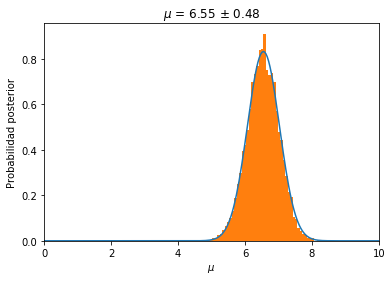

In [5]:
plt.figure()
plt.plot(mu,posterior)
plt.xlabel(r'$\mu$'.format())
plt.ylabel('Probabilidad posterior')
plt.xlim(0,10)
plt.title(r'$\mu$ = {:.2f} $\pm$ {:.2f}'.format(mu_0,sigma_0))

#plt.figure()
plt.hist(z,bins=50,rwidth=5,density=True)
#plt.xlim(0,10)